In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Food_Delivery_Times.csv")

In [3]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [5]:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


In [6]:
df.isna()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [7]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [8]:
df=df.dropna()

In [9]:
df.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

                        Order_ID  Distance_km  Preparation_Time_min  \
Order_ID                1.000000    -0.010832             -0.030512   
Distance_km            -0.010832     1.000000             -0.025092   
Preparation_Time_min   -0.030512    -0.025092              1.000000   
Courier_Experience_yrs  0.001306    -0.003287             -0.030337   
Delivery_Time_min      -0.009184     0.813455              0.297852   

                        Courier_Experience_yrs  Delivery_Time_min  
Order_ID                              0.001306          -0.009184  
Distance_km                          -0.003287           0.813455  
Preparation_Time_min                 -0.030337           0.297852  
Courier_Experience_yrs                1.000000          -0.078258  
Delivery_Time_min                    -0.078258           1.000000  


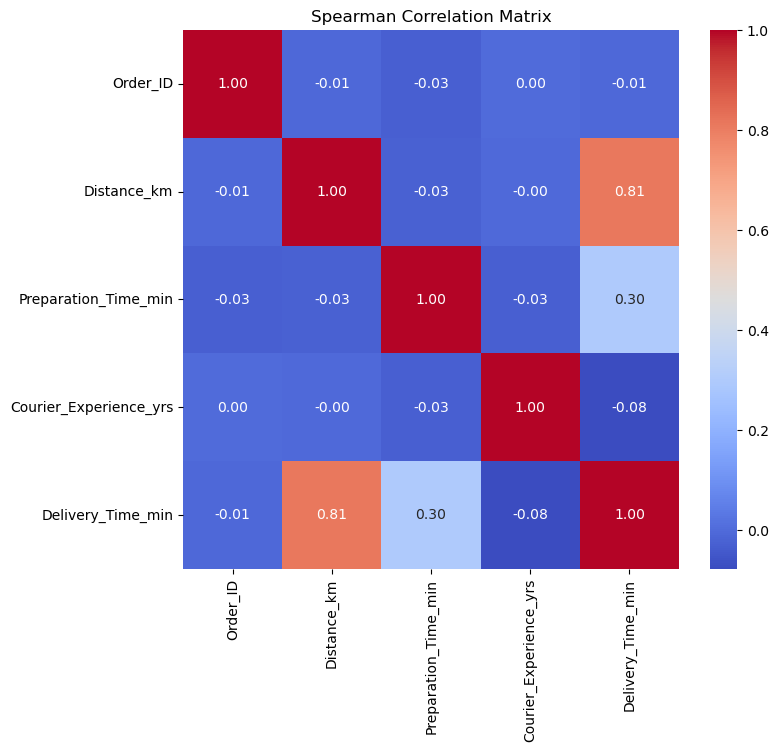

In [10]:
numeric_df = df.select_dtypes(include=['number'])
spearman_corr = numeric_df.corr(method='spearman')

print(spearman_corr)


plt.figure(figsize=(8, 7))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Spearman Correlation Matrix')
plt.show()


In [11]:
#--------------Preparing data
#I will use One-hot encoding, since in this dataset the fiches are mostly nominal categories.

In [12]:
df = pd.get_dummies(df, columns=['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type'], drop_first=True)

In [13]:
df.head()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Traffic_Level_Low,Traffic_Level_Medium,Time_of_Day_Evening,Time_of_Day_Morning,Time_of_Day_Night,Vehicle_Type_Car,Vehicle_Type_Scooter
0,522,7.93,12,1.0,43,0,0,0,1,1,0,0,0,0,0,1
1,738,16.42,20,2.0,84,0,0,0,0,0,1,1,0,0,0,0
2,741,9.52,28,1.0,59,1,0,0,0,1,0,0,0,1,0,1
3,661,7.44,5,1.0,37,0,1,0,0,0,1,0,0,0,0,1
4,412,19.03,16,5.0,68,0,0,0,0,1,0,0,1,0,0,0


In [14]:
df.shape

(883, 16)

In [15]:
X = df.drop(['Order_ID', 'Delivery_Time_min'], axis = 1)
y = df['Delivery_Time_min']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=250) 


In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [18]:
# testing
y_pred = lr_model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print("R2 Score : ",r2score)

R2 Score :  0.7396248038053401


In [19]:
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [28]:
# testing
y_pred = lasso.predict(X_test)
r2score = r2_score(y_test,y_pred)
print("R2 Score : ",r2score)

R2 Score :  0.6928381053176959


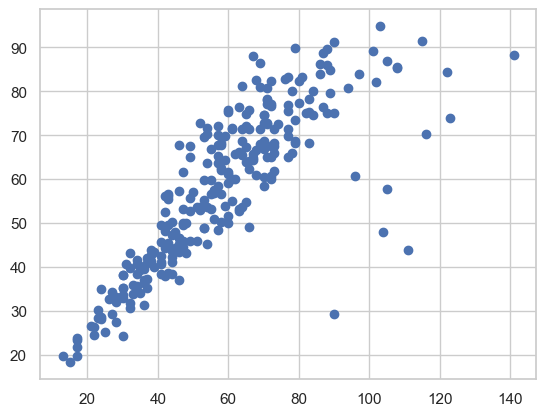

In [39]:
plt.scatter(y_test,y_pred)